<a href="https://colab.research.google.com/github/DarshanDinni/learn_pytorch/blob/main/03_Computer_vision_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install patool kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 795.7 kB/s eta 0:00:00


In [2]:
# Importing the required libraries
import os
import random
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patoolib
import shutil

from PIL import Image

**Set up google colab to download dataset from kaggle:**
https://saturncloud.io/blog/importing-datasets-from-kaggle-to-google-colab/

In [3]:
# Mount the google drive to the google colab
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Set Kaggle Configuration: To direct Kaggle to the appropriate directory in Drive
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/DeepLearning/kaggle'

In [5]:
# Downloading the dataset
!kaggle datasets download -d harishkumardatalab/food-image-classification-dataset

 99% 1.67G/1.68G [00:15<00:00, 168MB/s]
100% 1.68G/1.68G [00:15<00:00, 115MB/s]


In [6]:
# Extract the downloaded zip file dataset
patoolib.extract_archive("food-image-classification-dataset.zip",outdir="/content")

INFO patool: Extracting food-image-classification-dataset.zip ...
INFO:patool:Extracting food-image-classification-dataset.zip ...
INFO patool: running /usr/bin/7z x -o/content -- food-image-classification-dataset.zip
INFO:patool:running /usr/bin/7z x -o/content -- food-image-classification-dataset.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... food-image-classification-dataset.zip extracted to `/content'.
INFO:patool:... food-image-classification-dataset.zip extracted to `/content'.


'/content'

**Understanding the data**

In [7]:
# Get the current working directory
CURRENT_DIRECTORY = os.getcwd()

# Default path for the dataset folder
DATASET_PATH = os.path.join(CURRENT_DIRECTORY, 'Food Classification dataset')

RANDOM_IMAGE_PATH = []

# Checking how many images we have in each food class
dataset_folder = os.listdir(DATASET_PATH)
for file in dataset_folder:
  SUB_FOLDER_PATH = os.path.join(DATASET_PATH, file)
  RANDOM_IMAGE_PATH.append(SUB_FOLDER_PATH + '/' + os.listdir(SUB_FOLDER_PATH)[0])
  print(f'{file}:  {len(os.listdir(SUB_FOLDER_PATH))} images')

sushi:  1000 images
cheesecake:  1000 images
kulfi:  214 images
fried_rice:  350 images
Taco:  1500 images
pizza:  275 images
masala_dosa:  273 images
butter_naan:  307 images
kadai_paneer:  334 images
pav_bhaji:  305 images
ice_cream:  1000 images
Fries:  1500 images
momos:  323 images
chai:  344 images
Baked Potato:  1500 images
paani_puri:  144 images
chicken_curry:  1000 images
idli:  302 images
jalebi:  288 images
samosa:  244 images
Taquito:  1500 images
Donut:  1500 images
chole_bhature:  376 images
Crispy Chicken:  1500 images
Sandwich:  1500 images
omelette:  1000 images
pakode:  269 images
dal_makhani:  295 images
dhokla:  245 images
Hot Dog:  1548 images
burger:  331 images
apple_pie:  1000 images
chapati:  327 images
kaathi_rolls:  279 images


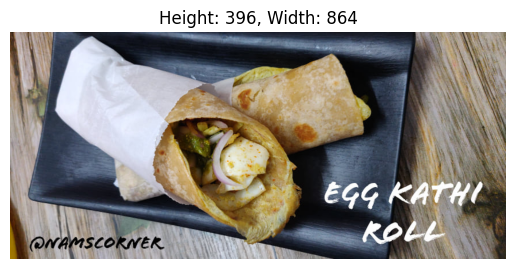

In [8]:
# Selecting any random image path
random_image = random.choice(RANDOM_IMAGE_PATH)
image = Image.open(random_image)

# Display the image
plt.title(f'Height: {image.height}, Width: {image.width}')
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels if you prefer
plt.show()

**Creating subset of the complete dataset**

In [9]:
def create_subset(train_sample_size, test_sample_size, class_size, original_dataset_path, working_directory):

  # Default path for train and test subset
  SUBSET_DATASET_PATH_TRAIN = working_directory + '/' + 'train'
  SUBSET_DATASET_PATH_TEST = working_directory + '/' + 'test'

  # Create the new subset directory path for train and test data if it doesn't exist
  os.makedirs(SUBSET_DATASET_PATH_TRAIN, exist_ok=True)
  os.makedirs(SUBSET_DATASET_PATH_TEST, exist_ok=True)

  # Get the list of all the food classes in the dataset
  food_folder = os.listdir(original_dataset_path)

  # Randomly select classes of food to create subset of data
  subset_folder = random.sample(food_folder, class_size)

  for images in range(len(subset_folder)):

    FOLDER_PATH = os.path.join(original_dataset_path, subset_folder[images])

    # Creating the path of different category of class for subset class
    SUBSET_FOLDER_PATH_TRAIN = os.path.join(SUBSET_DATASET_PATH_TRAIN, subset_folder[images])
    SUBSET_FOLDER_PATH_TEST = os.path.join(SUBSET_DATASET_PATH_TEST, subset_folder[images])

    # Create the subset directory for train and test sub-folders if it doesn't exist
    os.makedirs(SUBSET_FOLDER_PATH_TRAIN, exist_ok=True)
    os.makedirs(SUBSET_FOLDER_PATH_TEST, exist_ok=True)

    # Get the list of all the food image from the respective class
    food_images = os.listdir(FOLDER_PATH)

    # Randomly select images of food to create subset of respective class
    subset_image_train = random.sample(food_images, train_sample_size)
    subset_image_test = random.sample(food_images, test_sample_size)

    # Copy training data selected files from the original dataset to the subset dataset
    for file_name in subset_image_train:
        source_path = os.path.join(FOLDER_PATH, file_name)
        destination_path = os.path.join(SUBSET_FOLDER_PATH_TRAIN, file_name)
        shutil.copyfile(source_path, destination_path)

    # Copy testing data selected files from the original dataset to the subset dataset
    for file_name in subset_image_train:
        source_path = os.path.join(FOLDER_PATH, file_name)
        destination_path = os.path.join(SUBSET_FOLDER_PATH_TEST, file_name)
        shutil.copyfile(source_path, destination_path)

In [10]:
# Specify number of samples for each category of food
number_of_sample_train = 100
number_of_sample_test = 50

# Specify number of classes we will use
number_of_classes = 5  # total number of classes in the dataset are 34

# Create training and testing subset data
create_subset(number_of_sample_train, number_of_sample_test, number_of_classes, DATASET_PATH, CURRENT_DIRECTORY)